# Analysis of attendance data

After acquiring all 17 csv files and transforming them by concatenating them into a single file, we begin our analysis of the data to retrieve key attendance indicators. Our goal is to help the end stakeholder to better understand meeting attendance based on a number of factors to then hopefully increase attendance in future events. The stakeholder will also be able to better plan for future events using predictive analytics

### Cleaning the data

The first step is to identify any null values which will effect our analysis. Upon previous examination of the csv file, we have noted that there are a number of "Unrecognized Users" registered in events. These observations will limit our understanding of the data and hence will need to be removed

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
os.chdir("/Users/pranav/Desktop/MIST 5740S /Project")

In [5]:
final_data = pd.read_csv("final_data.csv")
final_data.set_index("First Name", inplace=True)
final_data

,Last Name,Campus Email,Preferred Email,Attendance Status,Marked By,Marked On,Comments,Card ID Number,Event Name
First Name,,,,,,,,,
Jordan,Castle,jlc82312@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck
Hwain,Mun,hm74048@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck
Josh,Rapp,jhr00693@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck
Vanna,Yan,vy09957@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck
My,Hoang,myh80829@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck
...,...,...,...,...,...,...,...,...,...
Jiawen,Wang,jw19604@uga.edu,NaN,Attended,Isabelle Leong,2023-11-18,NaN,NaN,FamFeast
Baiheng,Wang,bw73506@uga.edu,NaN,Attended,Isabelle Leong,2023-11-18,NaN,NaN,FamFeast
Hope,Dang,hkd66541@uga.edu,NaN,Attended,Isabelle Leong,2023-11-18,NaN,NaN,FamFeast


In [6]:
unique_emails = final_data['Campus Email'].unique().tolist()
len(unique_emails)

820

In [7]:
none_values = final_data[final_data['Campus Email'].isnull()]
none_values

,Last Name,Campus Email,Preferred Email,Attendance Status,Marked By,Marked On,Comments,Card ID Number,Event Name
First Name,,,,,,,,,
Unrecognized User,NaN,NaN,NaN,Attended,Vanna Yan,2024-02-21,NaN,NaN,Lunars
Unrecognized User,NaN,NaN,NaN,Attended,Vanna Yan,2023-09-12,NaN,NaN,TriviaNight
Unrecognized User,NaN,NaN,NaN,Attended,Vanna Yan,2023-09-12,NaN,NaN,TriviaNight
Unrecognized User,NaN,NaN,NaN,Attended,Vanna Yan,2023-10-23,NaN,NaN,APIDANightMarket
Unrecognized User,NaN,NaN,NaN,Attended,Vanna Yan,2023-10-23,NaN,NaN,APIDANightMarket
Unrecognized User,NaN,NaN,NaN,Attended,Vanna Yan,2023-09-08,NaN,NaN,FallGBM1


After importing and modifying the dataframe index, we identify the campus email as the primary key for the data set. We notice that there are 820 unique campus emails. However, upon furter inspection, we find a number of "Unrecognized Users" in our data frame which need to be removed

In [8]:
final_data = final_data[final_data.index != 'Unrecognized User']

In [9]:
none_values = final_data[final_data['Campus Email'].isnull()]
none_values

,Last Name,Campus Email,Preferred Email,Attendance Status,Marked By,Marked On,Comments,Card ID Number,Event Name
First Name,,,,,,,,,


In [8]:
unique_emails = final_data['Campus Email'].unique().tolist()
len(unique_emails)

819

After confirming that we have removed the "Unrecognized User[s]" from the data set, we are free to begin analysis on our data

### Exploratory Analysis of data

Analyzing the data involves asking and answering questions that will create value to the end customer (AASA in our case). Some of the questions we want to ask are: 
- What does attendance look like month to month?
- What does yearly attendance look like?
- Who are the most engaged members?
- What does attendance and absenteeism look like based on the event and member?

**What does attendance look like month to month?**

In [43]:
final_data.loc[:, 'Marked On'] = pd.to_datetime(final_data['Marked On'])

/var/folders/px/gp5k7jk15txc7t1l_67mn5780000gn/T/ipykernel_19991/808202159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, 'Marked On'] = pd.to_datetime(final_data['Marked On'])
/var/folders/px/gp5k7jk15txc7t1l_67mn5780000gn/T/ipykernel_19991/808202159.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_data.loc[:, 'Marked On'] = pd.to_datetime(final_data['Marked On'])


In [42]:
final_data.loc[:,'Month'] = final_data['Marked On'].dt.to_period('M')
final_data.head()

/var/folders/px/gp5k7jk15txc7t1l_67mn5780000gn/T/ipykernel_19991/1060220413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:,'Month'] = final_data['Marked On'].dt.to_period('M')
/var/folders/px/gp5k7jk15txc7t1l_67mn5780000gn/T/ipykernel_19991/1060220413.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_data.loc[:,'Month'] = final_data['Marked On'].dt.to_period('M')


,Last Name,Campus Email,Preferred Email,Attendance Status,Marked By,Marked On,Comments,Card ID Number,Event Name,Month,Full Name
First Name,,,,,,,,,,,
Jordan,Castle,jlc82312@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Jordan Castle
Hwain,Mun,hm74048@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Hwain Mun
Josh,Rapp,jhr00693@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Josh Rapp
Vanna,Yan,vy09957@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Vanna Yan
My,Hoang,myh80829@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,My Hoang


In [16]:
monthly_attendance = final_data.groupby('Month').size()
monthly_attendance

Month
2023-09    555
2023-10    753
2023-11    281
2023-12     37
2024-01    140
2024-02    242
Freq: M, dtype: int64

In the above lines of code, we prepare the data to show a figure containing monthly attendance totals. We first make sure to convert the 'Marked On' column to date-time, then we create a new column named 'Month' from the 'Marked On' column for ease of grouping. Finally, we make a pandas series with an index containing months and values containing total attendance for that month.

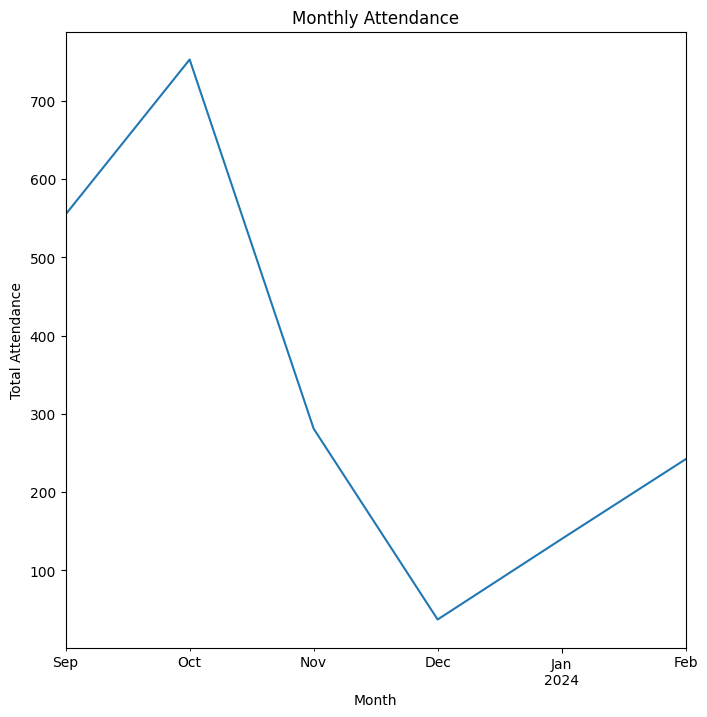

In [21]:
import matplotlib.pyplot as subplot
subplot.figure(figsize=(8,8))
monthly_attendance.plot(kind = 'line')
subplot.title('Monthly Attendance')
subplot.xlabel('Month')
subplot.ylabel('Total Attendance')
subplot.show()

From the plot above, we can see that attendance peaks in October on 2023 and then hits a trough in December of 2023. We can now explore other variables to see the likely cause of the attendance peak and trough. One likely variable is the number of events per month, as it is not consistent month to month.

In [28]:
monthly_events = final_data.groupby('Month')['Event Name'].nunique()
monthly_events

Month
2023-09    3
2023-10    5
2023-11    5
2023-12    1
2024-01    1
2024-02    2
Freq: M, Name: Event Name, dtype: int64

From the code, we group the final_data dataframe by month and then get the number of unique event names for each month. From the resulting series, we find that October and November have the highest number of events at 5. While October has the highest attendance rate, November has a lot lower of an attendance rate than October while having the same number of events. Furthermore, September only had 3 events but has the second higest total attendance rate. 

To investigate further, we will create a series listing the events hosted each month and the corresponding attendance for each event

In [36]:
Event_attendance_per_month = final_data.groupby(['Month', 'Event Name']).size()
Event_attendance_per_month

Month    Event Name                           
2023-09  FallGBM1                                 333
         FamCon                                   131
         TriviaNight                               91
2023-10  APIDANightMarket                         390
         FallGBM2                                 169
         FreshmanGhostTour                         51
         HispanicHeritageMonthMovieNight           23
         PaintNight                               120
2023-11  FallGBM3                                  85
         FamFeast                                  50
         FriendsgivingPotluck                      52
         Mr.AASA                                   71
         NativeAmericanHeritageMonthMovieNight     23
2023-12  AASAOnIce                                 37
2024-01  SpringGBM1                               140
2024-02  ElementalEvening                          50
         Lunars                                   192
dtype: int64

From the series, we can see that the events hosted during October attract a much greater crowd than those hosted in November. More specifically, APIDANightMarket , FallGBM2, and PaintNight all have a greater attendance that any event hosted in November. 

Since the data we have is limited, it is hard to conclude any correlation between the event type and attendance. However, given more years of data, and similar events, we can run a regression based on types of events and attendance to see more precisely how specific events affect attendance to hopefully increase attendance for the club.

**Who are the most engaged members?**

Learning about engaged members can help us award them for their participation and motivate more members to join and participate to increase club attendance and recognition.

In [47]:
final_data.loc[:, 'Full Name'] = final_data.index + " " +final_data['Last Name']
final_data.head()

/var/folders/px/gp5k7jk15txc7t1l_67mn5780000gn/T/ipykernel_19991/4164520757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, 'Full Name'] = final_data.index + " " +final_data['Last Name']


,Last Name,Campus Email,Preferred Email,Attendance Status,Marked By,Marked On,Comments,Card ID Number,Event Name,Month,Full Name
First Name,,,,,,,,,,,
Jordan,Castle,jlc82312@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Jordan Castle
Hwain,Mun,hm74048@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Hwain Mun
Josh,Rapp,jhr00693@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Josh Rapp
Vanna,Yan,vy09957@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,Vanna Yan
My,Hoang,myh80829@uga.edu,NaN,Attended,Vanna Yan,2023-11-14,NaN,NaN,FriendsgivingPotluck,2023-11,My Hoang


In [72]:
engaged_members = final_data.groupby('Full Name').size()
sorted_engaged_members = engaged_members.sort_values(ascending = False)
sorted_engaged_members.head()

Full Name
Hwain Mun          16
Vanna Yan          15
Samantha Chiu      15
Olivia Lee         15
Joanna Yonathan    14
dtype: int64

In [73]:
sorted_engaged_members = sorted_engaged_members.to_frame()
sorted_engaged_members.columns = ['Attendance']
sorted_engaged_members['% Attended'] = round((sorted_engaged_members['Attendance']/17)*100,0)
sorted_engaged_members.head()

,Attendance,% Attended
Full Name,,
Hwain Mun,16,94.0
Vanna Yan,15,88.0
Samantha Chiu,15,88.0
Olivia Lee,15,88.0
Joanna Yonathan,14,82.0


After creating a series showing the most engaged members, we created a dataframe from the series to include an additional column which shows the percentage of total events attended by each member. We see that Hwain Mun has attended the most events since September 2023 at 16 events attended out of 17 (94% attendance rate). 

In [83]:
monthly_engaged_members = final_data.groupby(['Month', 'Full Name']).size()
s_monthly_engaged_members = monthly_engaged_members.sort_values(ascending=False)
s_monthly_engaged_members = s_monthly_engaged_members.to_frame()
s_monthly_engaged_members.columns = ['Attendance']
Top_monthly_engaged_members = s_monthly_engaged_members.groupby('Month').head(5)
Top_monthly_engaged_members

Attendance
Month   Full Name                    
2023-11 Josh Rapp                   5
2023-10 Samantha Chiu               5
        Rebecca Webber              5
2023-11 Jessica Nguyen              5
        Anushi Nigam                5
2023-10 Hwain Mun                   5
2023-11 Samantha Chiu               5
        Jordan Castle               5
2023-10 Vanna Yan                   5
        Jessica Nguyen              5
2023-09 Britney Nguyen              5
        Rebecca Lee                 3
        Rebecca Webber              3
        Alysa Young                 3
        Willie Lin                  3
2024-02 Chloe Chun                  2
        Elena Hong                  2
        Ashley Duncklee             2
        Ashley Chan                 2
        Hannah Hu                   2
2023-12 Sarah Washburn              2
        Mary Austin                 2
        Tessa Butterworth           1
        Noelle Rocheteau            1
        Nayeong Kweon               1
2024-01 Alex Lan                    1
        Albert Sun                  1
        Allen Chang                 1
        Alex Phan                   1
        Jonathan Li                 1

We also created a dataframe which includes the most engaged members based on each month.

This analysis would be useful to the club as they can then award Hwain for their patronage to the club. The awards would then influence more individuals to join the club and increase attendance overall for the club. This can result in more monetary gains through club fees. 

### Final Word

Based on our exploratory analysis, we have concluded that October 2023 has had the highest attendance rate out of any month (since September 2023). Furthermore, we have determined that although November and October have had an equal number of events (5), October's events are clearly much more popular due to the attendance numbers. While we do **NOT** have enough data to draw conclusions based on types of events and attendance, we _may_ be able to say that the types of events in October such as thr ADIPA Night Market will generate more attendance year over year compared to other events. This information can be useful so the executive board members of AASA can host more events which are popular (such as ADIPANightMarket) so as to attract more members and attendance and either raise awareness for causes supported by the club or increase revenue from club fees.

We have also created a meaningful dataframe that displays the top 5 most engaged members based on their attendance rate since september 2023. We found that Hwain Mun has the greatest percentage of event attendance with 94% (out of 16/17 events attended since September 2023). This data is useful because the executive board members can create an award system based on individuals who have the greatest attendance rate for each month. The award system will influence other members to increase participation, leading to benefits recognized by the club.